In [2]:
from pathlib import Path

ROOT = Path(globals()['__vsc_ipynb_file__']).parent.parent
print(ROOT)

import sys
sys.path.append(str(ROOT))

/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.experiment import Experiment

In [4]:
df_all = Experiment.df_experiments(Experiment.read_experiments('1/31bondsHW/'))

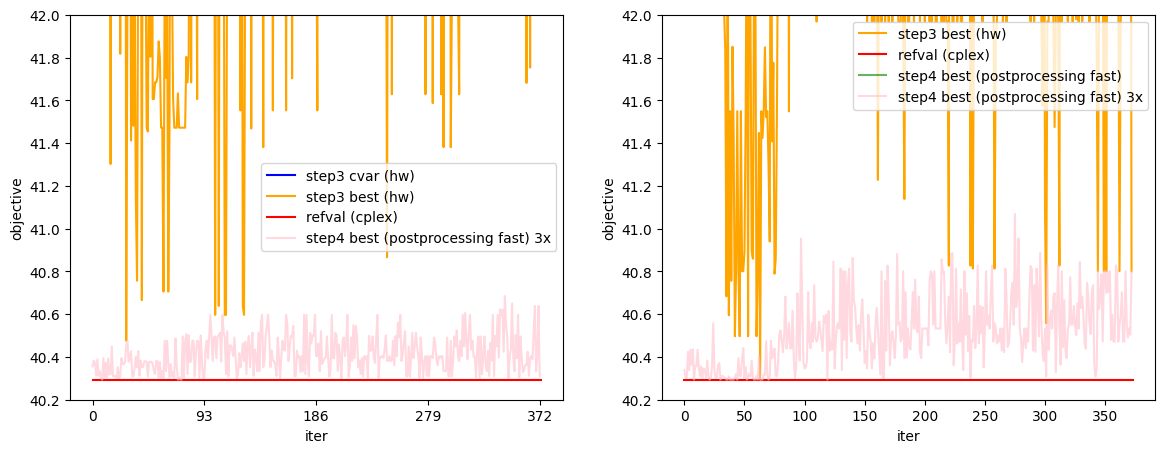

In [5]:
# sns.lineplot(ds['step3_monitor_iter_gtheta'], label='step3 cvar (sim)')
# sns.lineplot(ds['step3_iter_best_fx'], label='step3 best (sim)')
# sns.lineplot(ds['step4_iter_best_fx'], label='step4 best (postprocessing fast) 3x')
# sns.lineplot(x=[0,len(ds['step4_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r')
# plt.ylim([40,100])
# # plt.ylim([40.2,42])
# plt.xlabel('iter')
# plt.ylabel('objective')
# plt.xticks(np.arange(0, len(ds['step3_iter_best_fx'])+1, ds['step3_num_thetas']))
color_cvar = 'blue'
color_best3 = 'orange'
color_best4 = 'green'
color_best4_3 = 'pink'

_, axes = plt.subplots(1,2, figsize=(14,5))
axes=axes.T.flatten()
for x in range(2):
    ds = df_all.reset_index().loc[x]
    sns.lineplot(ds['step3_monitor_iter_gtheta'], label='step3 cvar (hw)', ax=axes[x], c=color_cvar)
    # sns.lineplot(ds['step3_monitor_iter_best_fx'], label='step3 (hw) best')
    sns.lineplot(ds['step3_iter_best_fx'], label='step3 best (hw)', ax=axes[x],  c=color_best3)
    sns.lineplot(x=[0,len(ds['step3_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r', ax=axes[x])
    if isinstance(ds['step4_iter_best_fx'][1], list):
        sns.lineplot([None if y is None else y[0] if len(y) == 3 else None for y in ds['step4_iter_best_fx']], label='step4 best (postprocessing fast)', ax=axes[x], alpha=.6, c=color_best4)
        sns.lineplot([None if y is None else min(y) if not isinstance(y[0], list) else None for y in ds['step4_iter_best_fx']], label='step4 best (postprocessing fast) 3x', ax=axes[x], alpha=.6, c=color_best4_3)
    else:
        sns.lineplot(ds['step4_iter_best_fx'], label='step4 best (postprocessing fast) 3x', ax=axes[x], alpha=.6, c=color_best4_3)
    axes[x].set_ylim([40.2,42])
    # axes[x].set_ylim([40.2,100])
    axes[x].set_xlabel('iter')
    axes[x].set_ylabel('objective')
    # if x != 2:
    # axes[x].get_legend().remove()
    if ds['step3_num_thetas'] == ds['step3_num_thetas']:
        axes[x].set_xticks(np.arange(0, len(ds['step3_iter_best_fx'])+1, ds['step3_num_thetas']))

93.0


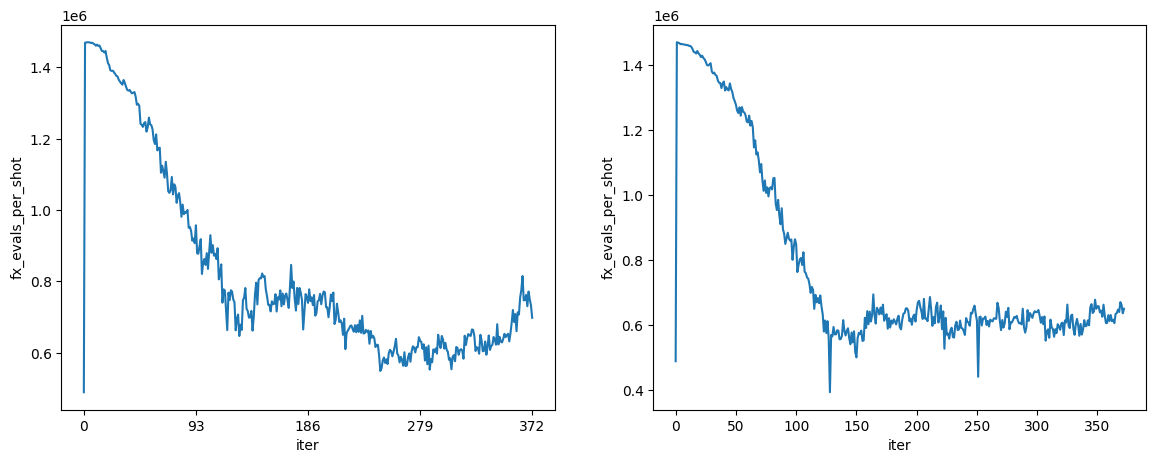

In [13]:
_, axes = plt.subplots(1,2, figsize=(14,5))
for x in range(2):
    ds = df_all.reset_index().loc[x]
    axes[x].plot(np.array(ds.step4_fx_evals))
    axes[x].set_xlabel('iter')
    axes[x].set_ylabel('fx_evals_per_shot')
    # plt.legend(loc='best')
    if not np.isnan(ds['step3_num_thetas']):
        print(ds['step3_num_thetas'])
        axes[x].set_xticks(np.arange(0, len(ds['step3_iter_best_fx'])+1, ds['step3_num_thetas']))

# Plots for slides

In [15]:
ds = df_all.reset_index().loc[0]

In [16]:
ds

index                                                                         0
experiment_id                                    TwoLocal2rep_piby3_kyiv_0.15/0
local_search_doe                                                           fast
ansatz                                                                 TwoLocal
theta_initial                                                             piby3
device                                                                 ibm_kyiv
optimizer                                                                   nft
alpha                                                                      0.15
theta_threshold                                                             0.0
lp_file                       /home/gabriele-agliardi/data/Client-Vanguard-O...
shots                                                                      8192
refx                          [0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 1.0, 1.0...
refvalue                                

([<matplotlib.axis.XTick at 0x30c4531f0>,
 [Text(0.0, 0, '0'),
  Text(93.0, 0, '93'),
  Text(186.0, 0, '186'),
  Text(279.0, 0, '279'),
  Text(372.0, 0, '372')])

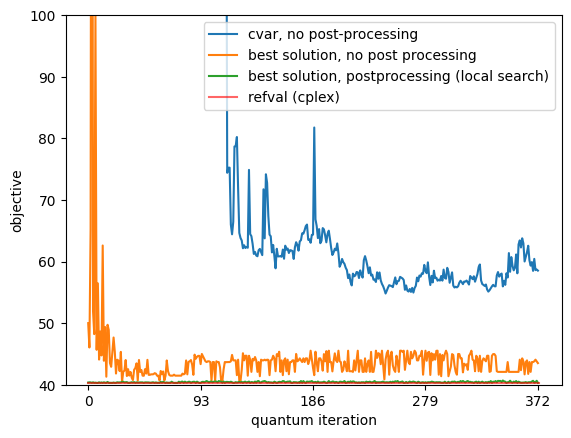

In [17]:
# TwoLocal2rep_piby3_AerSimulator_0.15/9

sns.lineplot(ds['step3_monitor_iter_gtheta'], label='cvar, no post-processing')
sns.lineplot(ds['step3_iter_best_fx'], label='best solution, no post processing')
sns.lineplot(ds['step4_iter_best_fx'], label='best solution, postprocessing (local search)')
sns.lineplot(x=[0,len(ds['step4_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r', alpha=.6)
plt.ylim([40,100])
# plt.ylim([40.2,42])
plt.xlabel('quantum iteration')
plt.ylabel('objective')
plt.xticks(np.arange(0, len(ds['step3_iter_best_fx'])+1, ds['step3_num_thetas']))

([<matplotlib.axis.XTick at 0x30c771180>,
 [Text(0.0, 0, '0'),
  Text(93.0, 0, '93'),
  Text(186.0, 0, '186'),
  Text(279.0, 0, '279'),
  Text(372.0, 0, '372')])

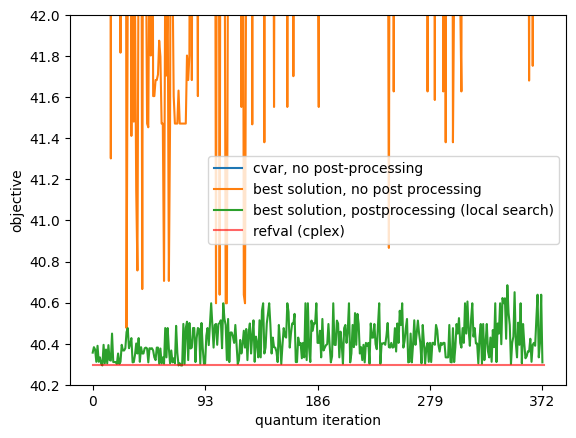

In [18]:
sns.lineplot(ds['step3_monitor_iter_gtheta'], label='cvar, no post-processing')
sns.lineplot(ds['step3_iter_best_fx'], label='best solution, no post processing')
sns.lineplot(ds['step4_iter_best_fx'], label='best solution, postprocessing (local search)')
sns.lineplot(x=[0,len(ds['step4_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r', alpha=.6)
plt.ylim([40.2,42])
plt.xlabel('quantum iteration')
plt.ylabel('objective')
plt.xticks(np.arange(0, len(ds['step3_iter_best_fx'])+1, ds['step3_num_thetas']))

([<matplotlib.axis.XTick at 0x317ecedd0>,
 [Text(0.0, 0, '0'),
  Text(93.0, 0, '93'),
  Text(186.0, 0, '186'),
  Text(279.0, 0, '279'),
  Text(372.0, 0, '372')])

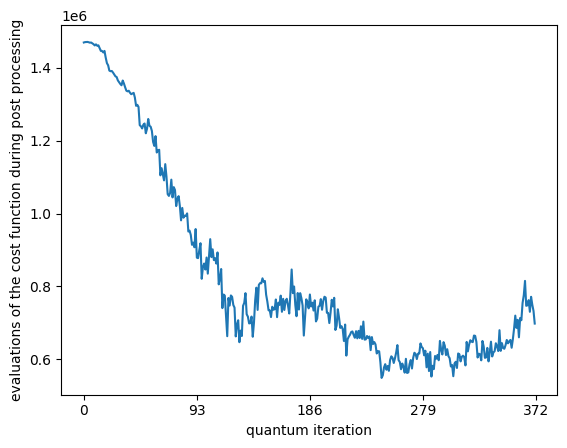

In [19]:
plt.plot(np.array(ds.step4_fx_evals[1:]))
plt.xlabel('quantum iteration')
plt.ylabel('evaluations of the cost function during post processing')
# plt.legend(loc='best')
plt.xticks(np.arange(0, len(ds['step3_iter_best_fx'])+1, ds['step3_num_thetas']))